In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import networkx
import networkx as nx
import datetime
from datetime import date, timedelta




## checked the contents of the datasets

In [3]:
checkin_state = pd.read_csv('checkin_state.csv')
checkin_state

date             state  checkins  unique_ind  unique_loc
0     12/1/2020             Johor   1996696      868521       81635
1     12/1/2020             Kedah    654634      341620       32760
2     12/1/2020          Kelantan    186507      108035       16298
3     12/1/2020            Melaka    544619      241854       21458
4     12/1/2020   Negeri Sembilan    559390      266899       22749
...         ...               ...       ...         ...         ...
6395   1/4/2022          Selangor   6726011     3178070      175415
6396   1/4/2022        Terengganu    463482      246077       20700
6397   1/4/2022  W.P. KualaLumpur   4844120     2290948       98474
6398   1/4/2022       W.P. Labuan     82915       33625        2137
6399   1/4/2022    W.P. Putrajaya    254835      157850        2936

[6400 rows x 5 columns]

In [4]:
cases_state = pd.read_csv('cases_state.csv')
cases_state 

date              state  cases_new  cases_import  cases_recovered  \
0      1/25/2020              Johor          4             4                0   
1      1/25/2020              Kedah          0             0                0   
2      1/25/2020           Kelantan          0             0                0   
3      1/25/2020             Melaka          0             0                0   
4      1/25/2020    Negeri Sembilan          0             0                0   
...          ...                ...        ...           ...              ...   
11387   1/5/2022           Selangor        908            44              906   
11388   1/5/2022         Terengganu        128             2              168   
11389   1/5/2022  W.P. Kuala Lumpur        245            70              276   
11390   1/5/2022        W.P. Labuan         15             5                5   
11391   1/5/2022     W.P. Putrajaya         25             2               18   

       cases_active  cases_cluster  cases_unvax  cases_pvax  cases_fvax  ...  \
0                 4              0            4           0           0  ...   
1                 0              0            0           0           0  ...   
2                 0              0            0           0           0  ...   
3                 0              0            0           0           0  ...   
4                 0              0            0           0           0  ...   
...             ...            ...          ...         ...         ...  ...   
11387         10207              9          175           5         656  ...   
11388          1906              0           25           1          84  ...   
11389          2845              0           48           4         167  ...   
11390            68              3            3           0           9  ...   
11391           390              0            5           0          16  ...   

       cases_0_4  cases_5_11  cases_12_17  cases_18_29  cases_30_39  \
0              0           0            0            0            0   
1              0           0            0            0            0   
2              0           0            0            0            0   
3              0           0            0            0            0   
4              0           0            0            0            0   
...          ...         ...          ...          ...          ...   
11387         45          74           37          235          216   
11388          7           3            2           22           27   
11389          8          14            6           62           76   
11390          0           3            1            2            4   
11391          0           4            4            4            3   

       cases_40_49  cases_50_59  cases_60_69  cases_70_79  cases_80  
0                1            0            0            0         0  
1                0            0            0            0         0  
2                0            0            0            0         0  
3                0            0            0            0         0  
4                0            0            0            0         0  
...            ...          ...          ...          ...       ...  
11387          107           82           67           28         6  
11388           22           19           13            7         6  
11389           35           22           18            2         2  
11390            3            1            0            1         0  
11391            6            3            1            0         0  

[11392 rows x 25 columns]

In [5]:
clusters = pd.read_csv('clusters.csv')
clusters

cluster         state       district  \
0                          KLUSTER WARGA JEPUN            14  LEMBAH PANTAI   
1                                  KLUSTER UDA  1,5,10,14,16       PELBAGAI   
2     KLUSTER KEAGAMAAN (TABLIGH SRI PETALING)             0       PELBAGAI   
3                    KLUSTER TABLIGH NEW DELHI    5,10,14,16       PELBAGAI   
4                                KLUSTER AIROD             6        KUANTAN   
...                                        ...           ...            ...   
6138                   KLUSTER PARIT CHE MANJA             8    HILIR PERAK   
6139                    KLUSTER JALAN HAMILTON             7     TIMUR LAUT   
6140         KLUSTER KAMPUNG TOK PANJANG SAUDI             3     KOTA BHARU   
6141      KLUSTER SIMPANG PINGGIRAN TONGKANG 2             1     BATU PAHAT   
6142                      KLUSTER JALAN DURIAN             8          KINTA   

     date_announced date_last_onset   category  status  cases_new  \
0          3/1/2020        3/9/2020     import   ended          0   
1          3/4/2020        3/1/2020     import   ended          0   
2         3/13/2020       3/11/2020  religious   ended          0   
3         3/16/2020       3/20/2020     import   ended          0   
4         3/31/2020       3/31/2020  workplace   ended          0   
...             ...             ...        ...     ...        ...   
6138       1/4/2022        1/3/2022  education  active          0   
6139       1/5/2022        1/4/2022   highRisk  active          9   
6140       1/5/2022        1/4/2022     import  active          1   
6141       1/5/2022        1/4/2022  workplace  active         12   
6142       1/5/2022        1/4/2022   highRisk  active         15   

      cases_total  cases_active  tests  icu  deaths  recovered  \
0               3             0    267    0       0          3   
1             144             0   1864    0       2        142   
2            2022             0  42023    0      34       1988   
3              24             0     57    0       0         24   
4              65             0    734    0       0         65   
...           ...           ...    ...  ...     ...        ...   
6138           15            15     45    0       0          0   
6139           12            12     24    0       0          0   
6140            7             7      8    0       0          0   
6141           22            22    836    0       0          0   
6142           16            16     26    0       0          0   

                                             summary_bm  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
6138  Kluster ini melibatkan kakitangan dan pelajar-...   
6139  Kluster ini melibatkan penghuni-penghuni dan p...   
6140  The index case for this cluster is a 53-year-o...   
6141  Kluster ini merupakan kluster berulang kali ke...   
6142  Kluster ini melibatkan kakitangan dan penghuni...   

                                             summary_en  
0                                                   NaN  
1                                                   NaN  
2                                                   NaN  
3                                                   NaN  
4                                                   NaN  
...                                                 ...  
6138  This cluster involves the staff and students o...  
6139  This cluster involves residents and employees ...  
6140  The index case for this cluster is a 53-year-o...  
6141  This cluster is the second recurring cluster a...  
6142  The cluster involves staff and residents at a ...  

[6143 rows x 16 columns]

## Chose the variables to be used from each dataset

In [40]:
cases_df = pd.read_csv("cases_state.csv", usecols = ['date','state','cases_new','cases_child','cases_adolescent', 'cases_adult','cases_elderly'])
print(cases_df)

            date              state  cases_new  cases_child  cases_adolescent  \
0      1/25/2020              Johor          4            0                 0   
1      1/25/2020              Kedah          0            0                 0   
2      1/25/2020           Kelantan          0            0                 0   
3      1/25/2020             Melaka          0            0                 0   
4      1/25/2020    Negeri Sembilan          0            0                 0   
...          ...                ...        ...          ...               ...   
11387   1/5/2022           Selangor        908          119                37   
11388   1/5/2022         Terengganu        128           10                 2   
11389   1/5/2022  W.P. Kuala Lumpur        245           22                 6   
11390   1/5/2022        W.P. Labuan         15            3                 1   
11391   1/5/2022     W.P. Putrajaya         25            4                 4   

       cases_adult  cases_e

## Converted the dates into the same format




In [41]:
cases_df['date'] = pd.to_datetime(cases_df.date)
cases_df


date              state  cases_new  cases_child  cases_adolescent  \
0     2020-01-25              Johor          4            0                 0   
1     2020-01-25              Kedah          0            0                 0   
2     2020-01-25           Kelantan          0            0                 0   
3     2020-01-25             Melaka          0            0                 0   
4     2020-01-25    Negeri Sembilan          0            0                 0   
...          ...                ...        ...          ...               ...   
11387 2022-01-05           Selangor        908          119                37   
11388 2022-01-05         Terengganu        128           10                 2   
11389 2022-01-05  W.P. Kuala Lumpur        245           22                 6   
11390 2022-01-05        W.P. Labuan         15            3                 1   
11391 2022-01-05     W.P. Putrajaya         25            4                 4   

       cases_adult  cases_elderly  
0                1              0  
1                0              0  
2                0              0  
3                0              0  
4                0              0  
...            ...            ...  
11387          640            101  
11388           90             26  
11389          195             22  
11390           10              1  
11391           16              1  

[11392 rows x 7 columns]

## Fixed the range of the dates to December, Jan and Feb

In [42]:
cases_df = cases_df.loc[ ( cases_df['date'] >= '2020-12-01') & (cases_df['date'] <= '2021-02-28' )]
cases_df

date              state  cases_new  cases_child  cases_adolescent  \
4976 2020-12-01              Johor         68           15                 7   
4977 2020-12-01              Kedah         21            0                 1   
4978 2020-12-01           Kelantan         10            1                 1   
4979 2020-12-01             Melaka          0            0                 0   
4980 2020-12-01    Negeri Sembilan        146            2                 0   
...         ...                ...        ...          ...               ...   
6411 2021-02-28           Selangor        914           38                13   
6412 2021-02-28         Terengganu         12            2                 1   
6413 2021-02-28  W.P. Kuala Lumpur        337            9                 5   
6414 2021-02-28        W.P. Labuan          2            0                 0   
6415 2021-02-28     W.P. Putrajaya          3            0                 0   

      cases_adult  cases_elderly  
4976           38              8  
4977           14              6  
4978            7              1  
4979            0              0  
4980          142              2  
...           ...            ...  
6411          780             33  
6412            8              1  
6413          312             11  
6414            2              0  
6415            2              1  

[1440 rows x 7 columns]

## Selected Sabah as the district to analyse

In [43]:
cases_df = cases_df.loc[cases_df['state'].isin(['Sabah'])]
cases_df

date  state  cases_new  cases_child  cases_adolescent  cases_adult  \
4985 2020-12-01  Sabah        267           29                21          202   
5001 2020-12-02  Sabah        229           37                19          153   
5017 2020-12-03  Sabah        310           53                22          211   
5033 2020-12-04  Sabah        320           59                28          198   
5049 2020-12-05  Sabah        391           50                35          270   
...         ...    ...        ...          ...               ...          ...   
6345 2021-02-24  Sabah        105           25                13           58   
6361 2021-02-25  Sabah         93           10                 6           65   
6377 2021-02-26  Sabah        129           12                14           89   
6393 2021-02-27  Sabah        157           22                21          102   
6409 2021-02-28  Sabah        134           21                19           88   

      cases_elderly  
4985             15  
5001             18  
5017             20  
5033             33  
5049             33  
...             ...  
6345              9  
6361             12  
6377             14  
6393             12  
6409              6  

[90 rows x 7 columns]

In [44]:
cases_df.count(axis='rows')

date                90
state               90
cases_new           90
cases_child         90
cases_adolescent    90
cases_adult         90
cases_elderly       90
dtype: int64

In [48]:
checkin_df = pd.read_csv("checkin_state.csv", usecols = ['date','state','checkins'])
print(checkin_df)

           date             state  checkins
0     12/1/2020             Johor   1996696
1     12/1/2020             Kedah    654634
2     12/1/2020          Kelantan    186507
3     12/1/2020            Melaka    544619
4     12/1/2020   Negeri Sembilan    559390
...         ...               ...       ...
6395   1/4/2022          Selangor   6726011
6396   1/4/2022        Terengganu    463482
6397   1/4/2022  W.P. KualaLumpur   4844120
6398   1/4/2022       W.P. Labuan     82915
6399   1/4/2022    W.P. Putrajaya    254835

[6400 rows x 3 columns]


In [49]:
checkin_df['date'] = pd.to_datetime(checkin_df.date)
checkin_df


date             state  checkins
0    2020-12-01             Johor   1996696
1    2020-12-01             Kedah    654634
2    2020-12-01          Kelantan    186507
3    2020-12-01            Melaka    544619
4    2020-12-01   Negeri Sembilan    559390
...         ...               ...       ...
6395 2022-01-04          Selangor   6726011
6396 2022-01-04        Terengganu    463482
6397 2022-01-04  W.P. KualaLumpur   4844120
6398 2022-01-04       W.P. Labuan     82915
6399 2022-01-04    W.P. Putrajaya    254835

[6400 rows x 3 columns]

In [50]:
checkin_df = checkin_df.loc[checkin_df['state'].isin(['Sabah'])]
checkin_df

date  state  checkins
9    2020-12-01  Sabah    740636
25   2020-12-02  Sabah    758731
41   2020-12-03  Sabah    743625
57   2020-12-04  Sabah    769607
73   2020-12-05  Sabah    777053
...         ...    ...       ...
6329 2021-12-31  Sabah   2216517
6345 2022-01-01  Sabah   1747858
6361 2022-01-02  Sabah   1818757
6377 2022-01-03  Sabah   1974892
6393 2022-01-04  Sabah   1981816

[400 rows x 3 columns]

In [51]:
checkin_df = checkin_df.loc[ ( checkin_df['date'] >= '2020-12-01') & (checkin_df['date'] <= '2021-02-28' )]
checkin_df

date  state  checkins
9    2020-12-01  Sabah    740636
25   2020-12-02  Sabah    758731
41   2020-12-03  Sabah    743625
57   2020-12-04  Sabah    769607
73   2020-12-05  Sabah    777053
...         ...    ...       ...
1369 2021-02-24  Sabah   1169850
1385 2021-02-25  Sabah   1213525
1401 2021-02-26  Sabah   1231709
1417 2021-02-27  Sabah   1290069
1433 2021-02-28  Sabah   1234884

[90 rows x 3 columns]

In [52]:
checkin_df.count(axis='rows')

date        90
state       90
checkins    90
dtype: int64

In [16]:
cluster_df = pd.read_csv("clusters.csv", usecols = ['date_announced','state','cases_new'])
print(cluster_df)

             state date_announced  cases_new
0               14       3/1/2020          0
1     1,5,10,14,16       3/4/2020          0
2                0      3/13/2020          0
3       5,10,14,16      3/16/2020          0
4                6      3/31/2020          0
...            ...            ...        ...
6138             8       1/4/2022          0
6139             7       1/5/2022          9
6140             3       1/5/2022          1
6141             1       1/5/2022         12
6142             8       1/5/2022         15

[6143 rows x 3 columns]


In [17]:
cluster_df['date_announced'] = pd.to_datetime(cluster_df.date_announced)
cluster_df

state date_announced  cases_new
0               14     2020-03-01          0
1     1,5,10,14,16     2020-03-04          0
2                0     2020-03-13          0
3       5,10,14,16     2020-03-16          0
4                6     2020-03-31          0
...            ...            ...        ...
6138             8     2022-01-04          0
6139             7     2022-01-05          9
6140             3     2022-01-05          1
6141             1     2022-01-05         12
6142             8     2022-01-05         15

[6143 rows x 3 columns]

In [18]:
cluster_df = cluster_df.loc[cluster_df['state'].isin(['12'])]
cluster_df

state date_announced  cases_new
25      12     2020-04-16          0
27      12     2020-04-16          0
31      12     2020-04-18          0
48      12     2020-05-13          0
65      12     2020-06-17          0
...    ...            ...        ...
6047    12     2021-12-14          0
6052    12     2021-12-15          0
6086    12     2021-12-22          0
6099    12     2021-12-25          0
6134    12     2022-01-03          2

[400 rows x 3 columns]

In [19]:
cluster_df = cluster_df.loc[ ( cluster_df['date_announced'] >= '2020-12-01') & (cluster_df['date_announced'] <= '2021-02-28' )]
cluster_df


state date_announced  cases_new
362     12     2020-12-01          0
363     12     2020-12-01          0
370     12     2020-12-03          0
371     12     2020-12-03          0
372     12     2020-12-03          0
...    ...            ...        ...
1054    12     2021-02-19          0
1059    12     2021-02-20          0
1086    12     2021-02-23          0
1102    12     2021-02-24          0
1114    12     2021-02-26          0

[68 rows x 3 columns]

## As 12 means Sabah, converted 12 to Sabah

In [20]:
cluster_df["state"].replace({"12": "Sabah"}, inplace=True)
cluster_df

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


state date_announced  cases_new
362   Sabah     2020-12-01          0
363   Sabah     2020-12-01          0
370   Sabah     2020-12-03          0
371   Sabah     2020-12-03          0
372   Sabah     2020-12-03          0
...     ...            ...        ...
1054  Sabah     2021-02-19          0
1059  Sabah     2021-02-20          0
1086  Sabah     2021-02-23          0
1102  Sabah     2021-02-24          0
1114  Sabah     2021-02-26          0

[68 rows x 3 columns]

In [21]:
cluster_df.rename(columns = {'date_announced':'date'}, inplace = True)
cluster_df

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


state       date  cases_new
362   Sabah 2020-12-01          0
363   Sabah 2020-12-01          0
370   Sabah 2020-12-03          0
371   Sabah 2020-12-03          0
372   Sabah 2020-12-03          0
...     ...        ...        ...
1054  Sabah 2021-02-19          0
1059  Sabah 2021-02-20          0
1086  Sabah 2021-02-23          0
1102  Sabah 2021-02-24          0
1114  Sabah 2021-02-26          0

[68 rows x 3 columns]

## Merged the cleaned datasets

In [53]:
cases_df['checkins'] = checkin_df['checkins'].values
cases_df


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



date  state  cases_new  cases_child  cases_adolescent  cases_adult  \
4985 2020-12-01  Sabah        267           29                21          202   
5001 2020-12-02  Sabah        229           37                19          153   
5017 2020-12-03  Sabah        310           53                22          211   
5033 2020-12-04  Sabah        320           59                28          198   
5049 2020-12-05  Sabah        391           50                35          270   
...         ...    ...        ...          ...               ...          ...   
6345 2021-02-24  Sabah        105           25                13           58   
6361 2021-02-25  Sabah         93           10                 6           65   
6377 2021-02-26  Sabah        129           12                14           89   
6393 2021-02-27  Sabah        157           22                21          102   
6409 2021-02-28  Sabah        134           21                19           88   

      cases_elderly  checkins  
4985             15    740636  
5001             18    758731  
5017             20    743625  
5033             33    769607  
5049             33    777053  
...             ...       ...  
6345              9   1169850  
6361             12   1213525  
6377             14   1231709  
6393             12   1290069  
6409              6   1234884  

[90 rows x 8 columns]

In [54]:
cases_df.count(axis='rows')

date                90
state               90
cases_new           90
cases_child         90
cases_adolescent    90
cases_adult         90
cases_elderly       90
checkins            90
dtype: int64

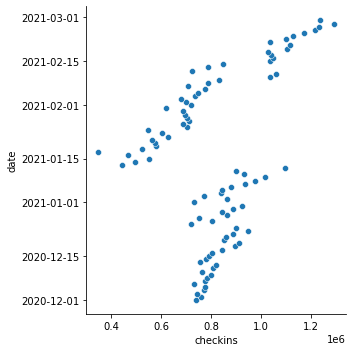

In [24]:
sns.relplot(x='checkins', y='date',data= cases_df)

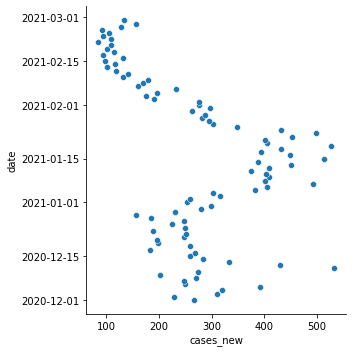

In [25]:
sns.relplot(x='cases_new', y='date',data= cases_df)

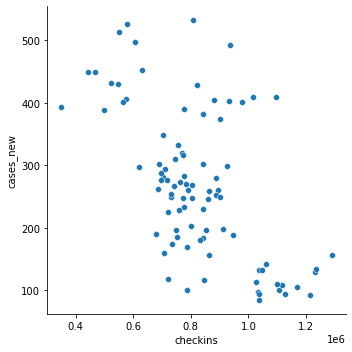

In [26]:
sns.relplot(x='checkins', y='cases_new',data= cases_df)

## Downloaded the dataframe into a csv file to look at it for rough work and analysis

In [55]:
#cases_df.to_csv(r'E:\university of malaya\Semester 1\Advanced Algorithm\project\new_final.csv', index=False)

In [56]:
cases_df['Month'] = pd.DatetimeIndex(cases_df['date']).month
cases_df['Month']= cases_df['Month'].map(str)

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
cases_df["Month"].replace({"12": "December"}, inplace=True)
cases_df["Month"].replace({"1": "January"}, inplace=True)
cases_df["Month"].replace({"2": "February"}, inplace=True)
cases_df

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas/core/series.py:4582: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



date  state  cases_new  cases_child  cases_adolescent  cases_adult  \
4985 2020-12-01  Sabah        267           29                21          202   
5001 2020-12-02  Sabah        229           37                19          153   
5017 2020-12-03  Sabah        310           53                22          211   
5033 2020-12-04  Sabah        320           59                28          198   
5049 2020-12-05  Sabah        391           50                35          270   
...         ...    ...        ...          ...               ...          ...   
6345 2021-02-24  Sabah        105           25                13           58   
6361 2021-02-25  Sabah         93           10                 6           65   
6377 2021-02-26  Sabah        129           12                14           89   
6393 2021-02-27  Sabah        157           22                21          102   
6409 2021-02-28  Sabah        134           21                19           88   

      cases_elderly  checkins     Month  
4985             15    740636  December  
5001             18    758731  December  
5017             20    743625  December  
5033             33    769607  December  
5049             33    777053  December  
...             ...       ...       ...  
6345              9   1169850  February  
6361             12   1213525  February  
6377             14   1231709  February  
6393             12   1290069  February  
6409              6   1234884  February  

[90 rows x 9 columns]

In [58]:
cases_df.to_csv(r'newly_cleaned.csv', index=False)

In [30]:
!pip install --upgrade plotly

In [34]:

px.scatter(cases_df, x='checkins', y= 'cases_new', 
           
           color='cases_new', size= 'cases_new', size_max=30)




In [35]:
q = px.scatter(cases_df, x="date", y="cases_new", color='checkins')
q.show()

In [ ]:
q.write_html("scatteralll.html")

In [36]:

s = px.bar(cases_df, x="Month", y="cases_new", color="checkins", 
       height=500)
s


In [37]:
s.write_html("bar.html")

In [38]:
cases_df.date

4985   2020-12-01
5001   2020-12-02
5017   2020-12-03
5033   2020-12-04
5049   2020-12-05
          ...    
6345   2021-02-24
6361   2021-02-25
6377   2021-02-26
6393   2021-02-27
6409   2021-02-28
Name: date, Length: 90, dtype: datetime64[ns]

In [39]:
m = px.scatter(cases_df, x="checkins", y="cases_new", animation_frame="Month", animation_group="cases_new",
           size="cases_new", color="checkins", hover_name="date",range_x=[300000,1400000], range_y=[25,700])
           

m["layout"].pop("updatemenus") # optional, drop animation buttons
m.show()

## Draw graph network of state: sabah and date from cases_df

In [ ]:
G2 = nx.from_pandas_edgelist(cases_df, source='state', target='date')
nx.draw(G2,node_color = 'yellow', with_labels=True)


## Draw graph network of date and checkins from cases_df

In [ ]:
G3 = nx.from_pandas_edgelist(cases_df, source='date', target='checkins')
nx.draw(G3)


## Merged G2 and G3 to get S1, where it connects Sabah to date, and the date's corresponding to checkins to places in Sabah

In [ ]:
S1 = networkx.compose(G2, G3)
nx.draw(S1)

In [ ]:
G4 = nx.from_pandas_edgelist(cases_df, source='date', target='cases_new')
nx.draw(G4)

## Connected date with both cases and checkins

In [ ]:
S2 = networkx.compose(S1, G4)
nx.draw(S2)

In [ ]:
nx.draw(S2, with_labels='True')